<a href="https://colab.research.google.com/github/Pasprihod/Math/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1. Нарисуйте график функции:   для некоторых (2-3 различных) значений параметров k, a, b


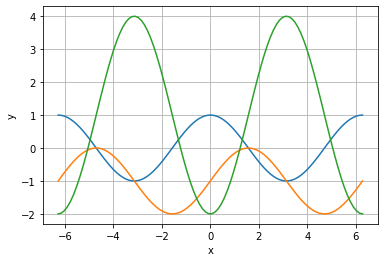

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 100)

a1=0
b1=0
k1=1
y1 = k1*np.cos(x-a1)+b1

a2=np.pi/2
b2=-1
k2=1
y2 = k2*np.cos(x-a2)+b2

a3=np.pi
b3=1
k3=3
y3 = k3*np.cos(x-a3)+b3

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)


Задание 3
Напишите код, который будет переводить полярные координаты в декартовы.
Напишите код, который будет рисовать график окружности в полярных координатах.
Напишите код, который будет рисовать график отрезка прямой линии в полярных координатах.


R =  5 
 alpha =  0.7853981633974483 
 x =  3.5355339059327378 
 y =  3.5355339059327373 



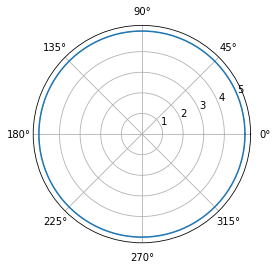

In [39]:
from matplotlib import figure
# Преобразование из полярных в декартовы координаты
import numpy as np

R=5
alpha = np.pi/4
x=R*np.cos(alpha)
y=R*np.sin(alpha)
print('R = ', R, '\n', 'alpha = ', alpha, '\n', 'x = ', x, '\n', 'y = ', y, '\n')

# Рисование окружности в полярных координатах

import matplotlib.pyplot as plt

alpha = np.linspace(0, 2*np.pi, 100)
R = 5
r = [R for _ in alpha]
plt.polar(alpha, r)



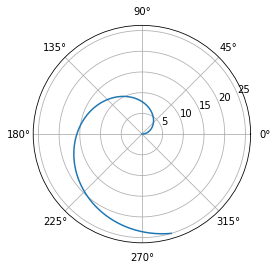

In [26]:
from matplotlib import figure
import numpy as np
# рисование графика отрезка прямой линии в полярных координатах
x=np.linspace(0,5,100)
y=5*x
plt.polar(x,y)

Задание 4. 

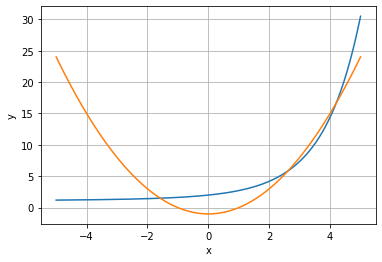

In [54]:
# 4.1 Решить. exp(x) + x∙(1 – y) = 1  
#          y = x**2 – 1
import numpy as np
import matplotlib.pyplot as plt


# строим графики, чтобы примерно определить корни
x = np.linspace(-5, 5, 200)
plt.grid(True)
# plt.ylim(-5,10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, 1+(np.exp(x)-1)/x)
plt.plot(x, x**2-1)

# Судя по графику, есть 3 корня, но есть еще один (0, -1), который исчез при делении на х. Т.е. всего должно быть 4 корня 

In [95]:
# решаем систему
from scipy.optimize import fsolve

def eq(p):
  x,y = p
  return (np.exp(x)+x*(1-y)-1, y-x**2+1)

# решение через сканирование диапазона
x_range = np.arange(-5,5)
y_range = x_range**2-1
sol = [[round(fsolve(eq, (x0,y0))[0],2), round(fsolve(eq, (x0,y0))[1],2)] for x0 in x_range for y0 in y_range]
sol=np.unique(sol, axis=0)
print('Решения системы уравнений:','\n',sol)

Решения: 
 [[-1.58  1.5 ]
 [-0.   -1.  ]
 [ 2.62  5.85]
 [ 4.2  16.64]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Решения системы уравнения и неравенства: 
 ['[-inf, -1.58]', '[-0.0, 2.62]', '[4.2, +inf]']


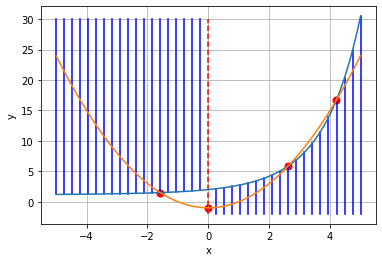

In [114]:
# 4.2. Решить y = x**2 – 1
#             exp(x) + x∙(1 – y)  - 1 > 0
# решением будут диапазоны значений х и соответствующие им значения функции y = x**2 – 1, удовлетворяющие неравенству

# представим решение графически:
plt.plot([0,0], [-2,30], 'r', linestyle = '--')
x_range_plus = np.linspace(0, 5, 20)
x_range_minus = np.linspace(-5, 0, 20)
y = 1+(np.exp(x)-1)/x
# рисуем области допустимых значений, согласно условию неравенства (х > 0, y < 1+(np.exp(x)-1)/x)  и (х < 0, y > 1+(np.exp(x)-1)/x)
for x in x_range_plus:
  plt.plot([x,x],[-2,1+(np.exp(x)-1)/x],'b')
for x in x_range_minus:
  plt.plot([x,x],[1+(np.exp(x)-1)/x, 30],'b')
x = np.linspace(-5, 5, 200)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, 1+(np.exp(x)-1)/x)
plt.plot(x, x**2-1)
for i in sol: # отмечаем корни
  plt.scatter(i[0], i[1],50, 'r')
 
#решаем аналитически

# 1. ищем значения y=x**2-1 в точках между корнями, чтобы потом проверить на удовлетворение неравенству

x_range = [f'[{sol[i][0]}, {sol[i+1][0]}]' for i in range(0,len(sol)-1)] # создаем список диапазонов согласно найденным корням
x_range.insert(0, f'[-inf, {sol[0][0]}]')
x_range.append(f'[{sol[-1][0]}, +inf]')

xy_for_uneq = [[i[0]-0.05, round((i[0]-0.05)**2-1,2)] for i in sol] # создаем список значений (х,у) для дальнейшей проверки, которые соответствуют диапазонам
xy_for_uneq.append([sol[-1][0]+0.05, round((sol[-1][0]-0.05)**2-1,2)] ) 

# 2. проверяем получившиеся значения неравенству
sol_uneq=[]
for i in range(len(xy_for_uneq)):
  x0=xy_for_uneq[i][0]
  y0=xy_for_uneq[i][1]
  if x0 < 0 and y0 > 1+(np.exp(x0)-1)/x0:
    sol_uneq.append(x_range[i])
  if x0 > 0 and y0 < 1+(np.exp(x0)-1)/x0:
    sol_uneq.append(x_range[i]) 
print('Решения системы уравнения и неравенства:', '\n', sol_uneq)

